# PyCoffee, 31 March 2016: AstroML  
## Presented by Adele

## An overview of AstroML: Machine Learning and Data Mining for Astronomy

* Python module for machine learning ("ML") and data mining built on numpy, scipy, scikit-learn, matplotlib, and astropy
* Designed with the statistical needs of astronomical community in mind (**astro-statistics**), using techniques developed from fields of statistics and machine learning.
* The goal is a community repository for fast python implementations, primarily using freely available astronomy datasets.  You can get/contribute to the code using github http://github.com/astroML/astroML.
* Authors are 3 astronomy professors at University of Washington and one computing professor (and software designer) at Georgia Tech.
* Find all of the information at the webpage: http://www.astroml.org/
* Cite the paper "Introduction to astroML: Machine learning for astrophysics", Vanderplas et al, proc. of CIDU, pp. 47-54, 2012. (http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6382200&tag=1).  They explain the examples: regression, density estimation, dimensionality reduction, periodic time series analysis, and hierarchical clustering.

## Most basically, what is machine learning? (see Chapter 1 in the book, then Ch. 8-10)
* Techniques to interpret data by comparing them to models for data behavior
* Examples are: regression methods, supervised classification methods, maximum likelihood estimators, Bayesian method
* A.K.A. inference techniques, data-based statistical inferences, or "fitting"
* Emphasis in machine learning is on *prediction* over *exploratory data analysis*
* Applications in astronomy, other natural sciences, medicine, Google, and it might be your key in the door to industry (e.g. Josh Bloom, astronomer at Berkeley and CTO at wise.io)
* In case you're not convinced of its importance:

> Machine Learning (CS 229) is the most popular course at Stanford. Why? Because, increasingly, machine learning is eating the world. Machine learning is a powerful artificial intelligence tool that enables us to crunch petabytes of data and make sense of a complicated world. And it’s transforming a wide variety of industries. It’s solving previously unsolved problems. (http://www.forbes.com/sites/85broads/2014/01/06/six-novel-machine-learning-applications/#5d9959c67bfb)

## On the AstroML webpage, you will find:

### * General AstroML figures  
http://www.astroml.org/examples/index.html 

In [18]:
%matplotlib inline

*Note.* For some AstroML examples that download public data, add this to your .bashrc:  
export ASTROML_DATA="/Users/Adele/Astro/AstroML/[whatever path you want]" 

"\n#------------------------------------------------------------\n# plot the r vs u-r color-magnitude diagram\n\nabsmag = data['ABSMAG']\n\nu = absmag[:, 2]\nr = absmag[:, 4]\n\nplt.figure()\nax = plt.axes()\nplt.scatter(u - r, r, s=1, lw=0, c=data['Z'], cmap=plt.cm.copper)\nplt.colorbar(ticks=np.linspace(0, 0.05, 6)).set_label('redshift')\n\nplt.xlim(0, 3.5)\nplt.ylim(-10, -24)\n\nplt.xlabel('u-r')\nplt.ylabel('r')\n\n#------------------------------------------------------------\n# plot a histogram of the redshift\nfrom astroML.plotting import hist\n\nplt.figure()\nhist(data['Z'], bins='knuth',\n     histtype='stepfilled', ec='k', fc='#F5CCB0')\nplt.xlabel('z')\nplt.ylabel('N(z)')\n\nplt.show()\n\n"

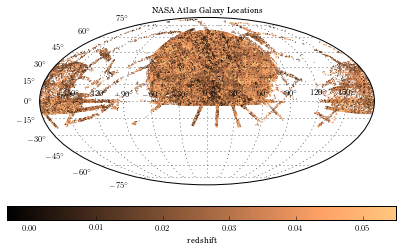

In [19]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_nasa_atlas

data = fetch_nasa_atlas()

#------------------------------------------------------------
# plot the RA/DEC in an area-preserving projection

RA = data['RA']
DEC = data['DEC']

# convert coordinates to degrees
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

ax = plt.axes(projection='mollweide')
plt.scatter(RA, DEC, s=1, c=data['Z'], cmap=plt.cm.copper,
            edgecolors='none', linewidths=0)
plt.grid(True)

plt.title('NASA Atlas Galaxy Locations')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.05, 6))
cb.set_label('redshift')

'''
#------------------------------------------------------------
# plot the r vs u-r color-magnitude diagram

absmag = data['ABSMAG']

u = absmag[:, 2]
r = absmag[:, 4]

plt.figure()
ax = plt.axes()
plt.scatter(u - r, r, s=1, lw=0, c=data['Z'], cmap=plt.cm.copper)
plt.colorbar(ticks=np.linspace(0, 0.05, 6)).set_label('redshift')

plt.xlim(0, 3.5)
plt.ylim(-10, -24)

plt.xlabel('u-r')
plt.ylabel('r')

#------------------------------------------------------------
# plot a histogram of the redshift
from astroML.plotting import hist

plt.figure()
hist(data['Z'], bins='knuth',
     histtype='stepfilled', ec='k', fc='#F5CCB0')
plt.xlabel('z')
plt.ylabel('N(z)')

plt.show()

'''

### * Python code for all textbook figures, including a nice gallery  
http://www.astroml.org/examples/index.html 

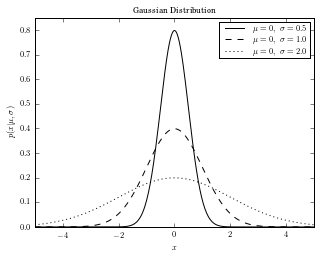

In [20]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma) #norm creates a normal continuous random variable

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()

### * An outline of some topics, with more elaborate explanation of the theory that can be found in the textbook  
http://www.astroml.org/user_guide/introduction.html

Optimization terminated successfully.
         Current function value: -2707.091713
         Iterations: 16
         Function evaluations: 46


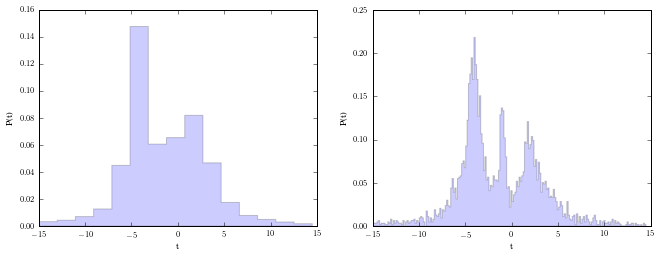

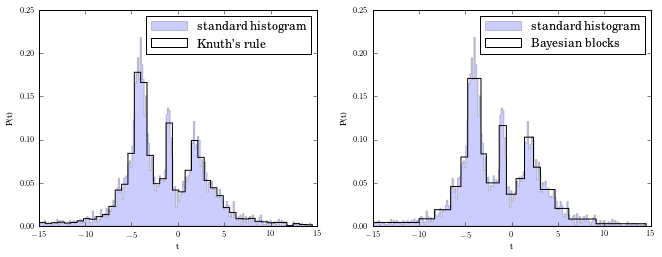

In [21]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.plotting import hist

# draw a set of variables
np.random.seed(0)
t = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
t = t[(t > -15) & (t < 15)]

#------------------------------------------------------------
# First figure: show normal histogram binning
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax1 = fig.add_subplot(121)
ax1.hist(t, bins=15, histtype='stepfilled', alpha=0.2, normed=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

ax2 = fig.add_subplot(122)
ax2.hist(t, bins=200, histtype='stepfilled', alpha=0.2, normed=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)')

#------------------------------------------------------------
# Second & Third figure: Knuth bins & Bayesian Blocks
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot in zip(['knuth', 'blocks'],
                                ["Knuth's rule", 'Bayesian blocks'],
                                [121, 122]):
    ax = fig.add_subplot(subplot)

    # plot a standard histogram in the background, with alpha transparency
    hist(t, bins=200, histtype='stepfilled',
         alpha=0.2, normed=True, label='standard histogram')

    # plot an adaptive-width histogram on top
    hist(t, bins=bins, ax=ax, color='black',
         histtype='step', normed=True, label=title)

    ax.legend(prop=dict(size=12))
    ax.set_xlabel('t')
    ax.set_ylabel('P(t)')

plt.show()

 ### * Installation information for AstroML
 * And its useful dependencies, like python, numpy, scipy, scikit-learn, matplotlib, astropy  
 http://www.astroml.org/user_guide/installation.html

## In the textbook you'll find:
* Intro to Python and Git, plotting, etc.
* Fast computation on Massive Data Sets
* Probability and Statistical Distributions
* Classical Statistical Inference
* Bayesian Statistical Inference
* Data Mining, including regression, classification, time series analysis


## On Github you'll find: 
* AstroML core source code repository
* Installation information
* Textbook figures code (well-written *.py files)
* Dependencies: Python, Numpy, Scipy, Scikit-learn, matplotlib, astropy
* Check out the latest AstroML: git clone git://github.com/astroML/astroML.git

## For more from the author (Jake Vanderplas), follow this tutorial: 
https://www.youtube.com/watch?v=HC0J_SPm9co  
Topic: scikit-learn (the python package) and machine learning  
Duration: 1hr 30mins, but worth your time!

### Basic principles of scikit-learn

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
# import seaborn; seaborn.set()



In [24]:
#linear regression is an "Estimator" object in scikit-learn, which you have to import
from sklearn.linear_model import LinearRegression 
#you can set some parameters when the object is instantiated
model = LinearRegression(normalize=True)
print(model)
print('My model is normalized: {}'.format(model.normalize))

LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
My model is normalized: True


### One of the simplest regression problems is fitting a line to data!!

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


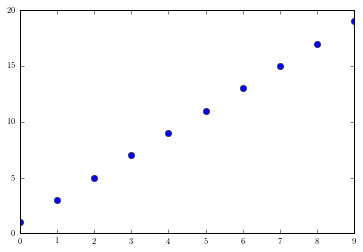

In [25]:
## Let's make a simple linear relation
x = np.arange(10)
y = 2 * x + 1
print(x)
print(y)

plt.plot(x,y,'o');


In [26]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
bigX = x[:, np.newaxis]
print(bigX)
print(y)

# fit the model on our data
model.fit(bigX, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [27]:
# Look at the parameters of the model
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)
print(model.residues_) ## pretty close to 0
#The model found a line with a slope 2 and intercept 1, as we'd expect.


[ 2.]
1.0
3.94430452611e-31


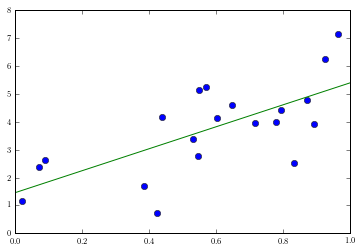

In [28]:
# Create some new data that aren't exactly linear
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);


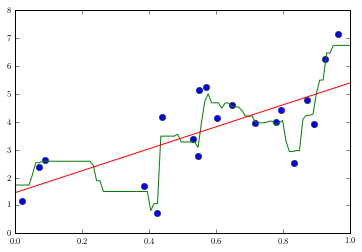

In [29]:
# A slightly more sophisticated model (depending on your data)
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

# Plot the data and the model prediction
X_fit_rf = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit_rf = model_rf.predict(X_fit_rf)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit_rf.squeeze(), y_fit_rf);
plt.plot(X_fit.squeeze(), y_fit,color='RED');

In [30]:
print('X=0.4, Y={0} or {1}'.format(model.predict(0.4),model_rf.predict(0.4)))
print('X=0.5, Y={0} or {1}'.format(model.predict(0.5),model_rf.predict(0.5)))


X=0.4, Y=[ 3.03625529] or [ 1.50036202]
X=0.5, Y=[ 3.42974642] or [ 3.27571149]


### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

### There are many more tools in scikit-learn

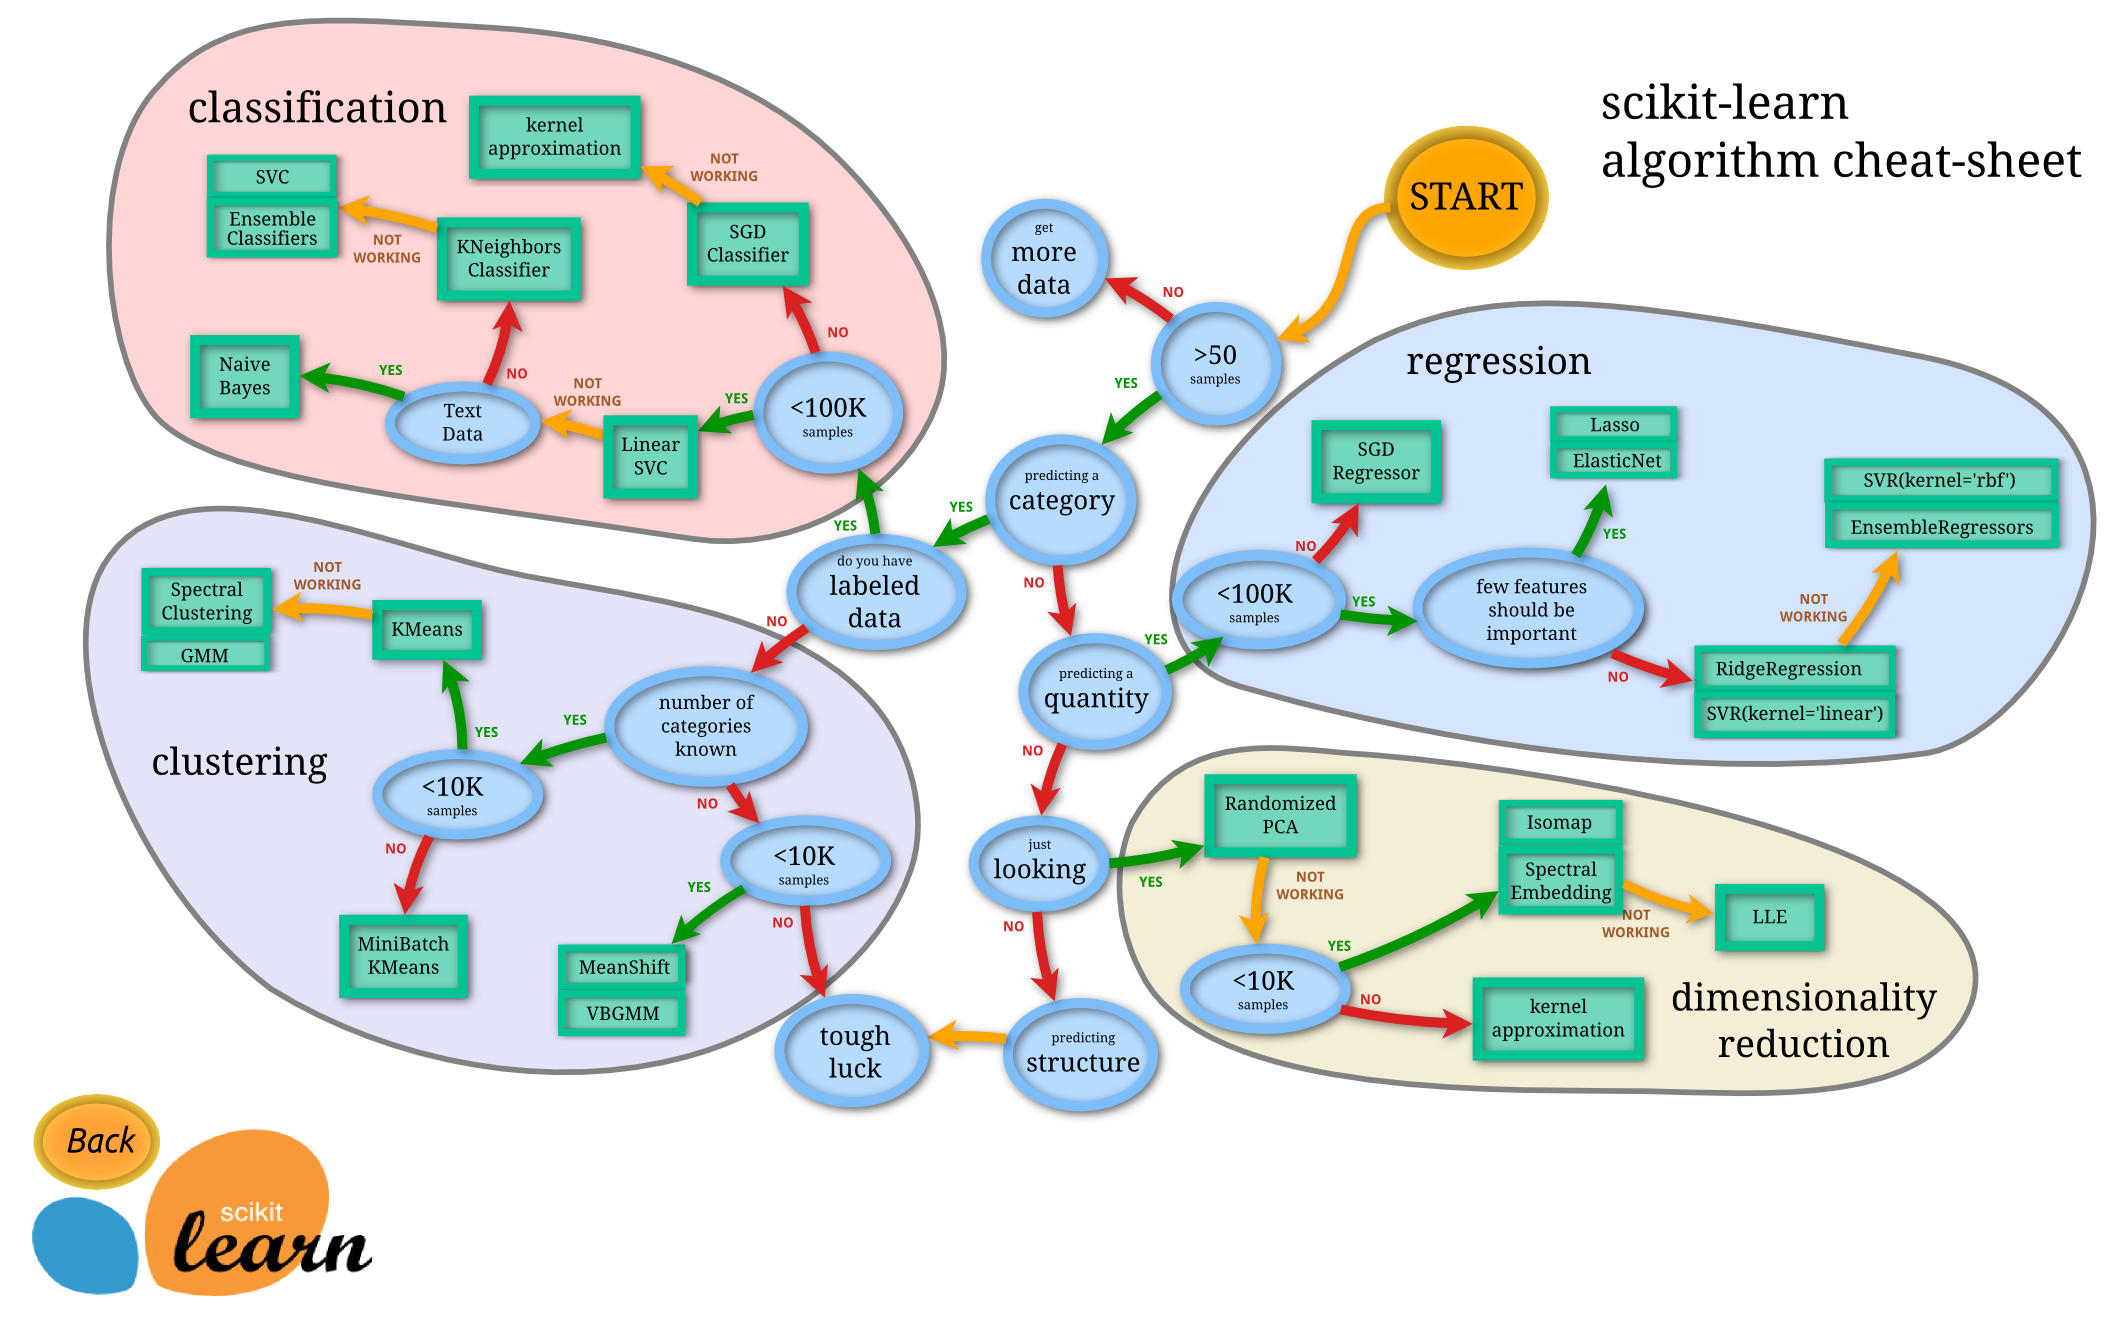

In [31]:
### There are many more tools in scikit-learn
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")

### And some super cool examples


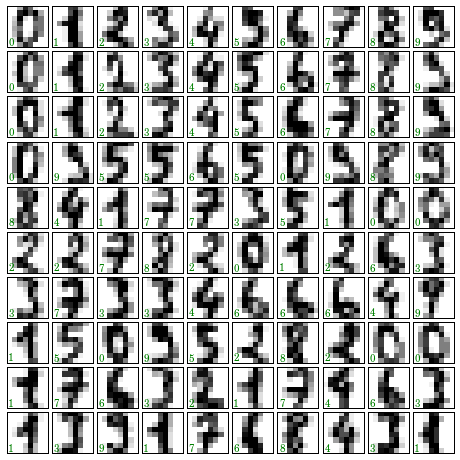

In [32]:
### And some super cool examples

from sklearn import datasets
digits = datasets.load_digits()
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [33]:
# The images themselves are represented as pixel values in an 8x8 grid
print(digits.images.shape)
print(digits.images[0]) #This is a zero

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


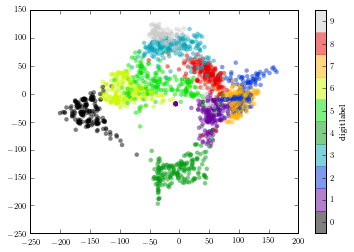

In [34]:
from sklearn.manifold import Isomap #this is a manifold learning algorithm
iso = Isomap(n_components=2) #transform the data into 2d
data_projected = iso.fit_transform(digits.data)

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
#The plot shows the digits in a 2-D parameter space

In [35]:
#Let's try a classification task on the digits

from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape) #the shape is due to the 8x8 (=64 pixels) grid, and the 1797 digits

((1347, 64), (450, 64))


In [36]:
# Use a simple logistic regression which is a classification algorithm
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest) #remember model.predict from above? this is the same ``predict''
#Now we have predicted the digit for all 450 of the Xtest cases, based on our training with Xtrain

In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest, ypred)
print('We are right {:.4%} of the time'.format(score))

We are right 94.6667% of the time


[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


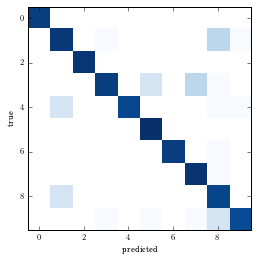

In [38]:
#There are several ways to check *where* it was right/wrong
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');


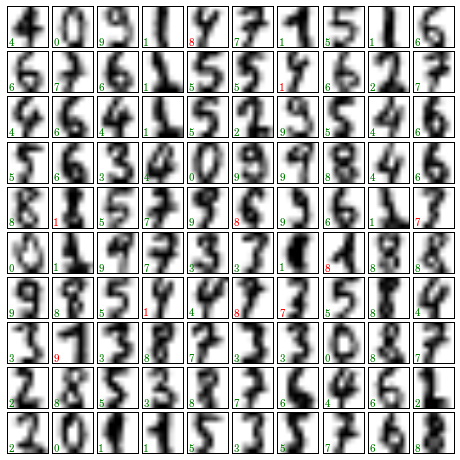

In [39]:
#Another way to check *where* it was right/wrong
#VISUAL
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

#### One more notebook that I really like:  
    https://github.com/jakevdp/sklearn_pydata2015/blob/master/notebooks/03.1-Classification-SVMs.ipynb

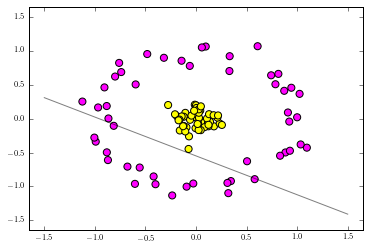

In [40]:
from IPython.html.widgets import interact
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.datasets.samples_generator import make_circles

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))


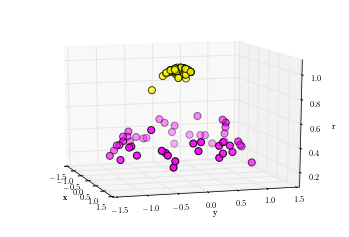

In [41]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

## Using github (a useful digression?)

Let's say you're watching the video tutorial, and you want to access the tutorial materials.  
* Download a zip file on github https://github.com/jakevdp/sklearn_pydata2015
* Or use **git**.  The advantage is that you can update your file when the "master" file changes

### First you need to get "git":

* I use this version of Git: https://git-scm.com/doc
* Here's a handy cheatsheep: https://training.github.com/kit/downloads/github-git-cheat-sheet.pdf
* You may also want GitHub Desktop: https://desktop.github.com/

### Now let's grab the tutorial materials:
1. Make or go into whatever directory where you want to save the material locally.
2. Simple command: git clone [[URL]]

In [ ]:
## 1. 
mkdir sklearn
cd sklearn

In [ ]:
## 2.
git clone git://github.com/jakevdp/sklearn_pydata2015.git
cd sklearn_pydata2015

You'll see that everything in the **repository** comes in a directory, usually containing a README file, a LICENSE file, and the notebooks (or whatever).

### What if you want a more updated version, because the author tells you he made changes?

You can now:
1. Check the status of your local repository.
2. Update the file(s)/directories that have been changed at the **master**.

In [ ]:
## 1. 
ls -al #look for a file called .git, and you know this is a repository
git log #see whether the author changed the **master** recently
git status #from Boris.

## 2.
git pull #should tell you if this is "Already up-to-date" (or not).

## OR
git fetch
get merge origin/master

## OR (if you intend to work more on your own version of the repository)
git remote -v
git remote add mine https://github.com/jakevdp/sklearn_pydata2015 
    #only necessary when you set-up this remote repository for the first time
git remote -v # See that it's there, along with the origin
git fetch mine #downloads from your remote repository called mine
git merge mine/master #combines the remote repository with the current local branch


Wait.  What's the difference between pull and fetch?  
* In the simplest terms, git pull does a **git fetch** followed by a **git merge**. 
* You can do a **git fetch** at any time to update your remote-tracking branches under refs/remotes/[[remote]]/. This operation never changes any of your own local branches under refs/heads, and is safe to do without changing your working copy.

### You can may also want to create your own repository:  
https://guides.github.com/activities/hello-world

<img src="https://guides.github.com/activities/hello-world/branching.png">

Have you ever saved different versions of a file? Something like:

story.txt  
story-joe-edit.txt  
story-joe-edit-reviewed.txt

Branches accomplish similar goals in GitHub repositories.

### If others are interested, we can continue tutorials together to learn AstroML, scikit-learn, etc.